In [1]:
import os

os.chdir('/mnt/jw01-aruk-home01/projects/ra_challenge/RA_challenge/michael_dev/RA2_alpine_lads/ra_joint_predictions')

In [2]:
from utils.config import Config

config = Config()

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import r2_score

hand_narrowing_predictions = []

def print_mae_report(title, values):
    print('-------')
    print(title)
    
    if values.size > 0:
        improved_ratio = np.count_nonzero(values < 0) / values.size

        print(f'Score improved on {improved_ratio}% of joints')
        print('Mean Score improvement:', np.mean(values[values < 0]), '(+/-: ', np.std(values[values < 0]), ')')
        print('Mean Score worsen:', np.mean(values[values > 0]), '(+/-: ', np.std(values[values > 0]), ')')

        plt.figure(figsize = (8, 8))
        plt.hist([np.absolute(values[values <= 0]), values[values > 0]], label=['Improved', 'Worsened'])
        plt.xlabel('MAE change')
        plt.ylabel('Number of joints')
        plt.legend()
        plt.title(title)
        plt.show()
    
    print('-------')

def print_report(truth, submitted_version, new_version):
    previos = submitted_version.merge(truth, how = 'inner', on  = 'Patient_ID')
    new = new_version.merge(truth, how = 'inner', on  = 'Patient_ID')

    print('Previous R2:', r2_score(previos['Overall_Tol_y'], previos['Overall_Tol_x']))
    print('New R2:', r2_score(new['Overall_Tol_y'], new['Overall_Tol_x']))
    
    print('Previous Narrowing R2:', r2_score(previos['Overall_narrowing_y'], previos['Overall_narrowing_x']))
    print('New Narrowing R2:', r2_score(new['Overall_narrowing_y'], new['Overall_narrowing_x']))
    
    print('Previous Erosion R2:', r2_score(previos['Overall_erosion_y'], previos['Overall_erosion_x']))
    print('New Erosion R2:', r2_score(new['Overall_erosion_y'], new['Overall_erosion_x']))
    
    print('Previous Overall MAE:', np.mean(np.absolute(previos['Overall_Tol_x'] - previos['Overall_Tol_y'])))
    print('New Overall MAE:', np.mean(np.absolute(new['Overall_Tol_x'] - new['Overall_Tol_y'])))
    
    truth_filter = ['_y' in column for column in previos.columns]
    pred_filter = ['_x' in column for column in previos.columns]
    
    narr_filter = ['J' in column for column in previos.columns]
    eros_filter = ['E' in column for column in previos.columns]
    
    hand_filter = ['H' in column for column in previos.columns]
    wrist_filter = ['wrist' in column for column in previos.columns]
    hand_filter = np.logical_and(hand_filter, np.logical_not(wrist_filter))
    feet_filter = ['F' in column for column in previos.columns]
    
    hand_narrowing_filter = np.logical_and(narr_filter, hand_filter)
    wrists_narrowing_filter = np.logical_and(narr_filter, wrist_filter)
    feet_narrowing_filter = np.logical_and(narr_filter, feet_filter)
    
    hand_erosion_filter = np.logical_and(eros_filter, hand_filter)
    wrists_erosion_filter = np.logical_and(eros_filter, wrist_filter)
    feet_erosion_filter = np.logical_and(eros_filter, feet_filter)
    
    print('-------')
    print('Previous Hand Narrowing R2', r2_score(np.sum(previos.iloc[:, np.logical_and(hand_narrowing_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(previos.iloc[:, np.logical_and(hand_narrowing_filter, pred_filter)].to_numpy(), axis = 1)))
    print('New Hand Narrowing R2', r2_score(np.sum(new.iloc[:, np.logical_and(hand_narrowing_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(new.iloc[:, np.logical_and(hand_narrowing_filter, pred_filter)].to_numpy(), axis = 1)))
    
    print('-------')
    
    print('Previous Wrist Narrowing R2', r2_score(np.sum(previos.iloc[:, np.logical_and(wrists_narrowing_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(previos.iloc[:, np.logical_and(wrists_narrowing_filter, pred_filter)].to_numpy(), axis = 1)))
    print('New Wrist Narrowing R2', r2_score(np.sum(new.iloc[:, np.logical_and(wrists_narrowing_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(new.iloc[:, np.logical_and(wrists_narrowing_filter, pred_filter)].to_numpy(), axis = 1)))
    
    print('-------')
    print('Previous Feet Narrowing R2', r2_score(np.sum(previos.iloc[:, np.logical_and(feet_narrowing_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(previos.iloc[:, np.logical_and(feet_narrowing_filter, pred_filter)].to_numpy(), axis = 1)))
    print('New Feet Narrowing R2', r2_score(np.sum(new.iloc[:, np.logical_and(feet_narrowing_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(new.iloc[:, np.logical_and(feet_narrowing_filter, pred_filter)].to_numpy(), axis = 1)))
    
    
    print('-------')
    print('Previous Hand Erosion R2', r2_score(np.sum(previos.iloc[:, np.logical_and(hand_erosion_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(previos.iloc[:, np.logical_and(hand_erosion_filter, pred_filter)].to_numpy(), axis = 1)))
    print('New Hand Erosion R2', r2_score(np.sum(new.iloc[:, np.logical_and(hand_erosion_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(new.iloc[:, np.logical_and(hand_erosion_filter, pred_filter)].to_numpy(), axis = 1)))
    
    print('-------')
    print('Previous Wrist Erosion R2', r2_score(np.sum(previos.iloc[:, np.logical_and(wrists_erosion_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(previos.iloc[:, np.logical_and(wrists_erosion_filter, pred_filter)].to_numpy(), axis = 1)))
    print('New Wrist Erosion R2', r2_score(np.sum(new.iloc[:, np.logical_and(wrists_erosion_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(new.iloc[:, np.logical_and(wrists_erosion_filter, pred_filter)].to_numpy(), axis = 1)))
    print('-------')
    print('Previous Feet Erosion R2', r2_score(np.sum(previos.iloc[:, np.logical_and(feet_erosion_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(previos.iloc[:, np.logical_and(feet_erosion_filter, pred_filter)].to_numpy(), axis = 1)))
    print('New Feet Erosion R2', r2_score(np.sum(new.iloc[:, np.logical_and(feet_erosion_filter, truth_filter)].to_numpy(), axis = 1), 
                           np.sum(new.iloc[:, np.logical_and(feet_erosion_filter, pred_filter)].to_numpy(), axis = 1)))
    print('-------')
    
    plt.figure(figsize = (8, 8))
    plt.scatter(previos['Overall_Tol_x'], previos['Overall_Tol_y'], label = 'Previous')
    plt.scatter(new['Overall_Tol_x'], new['Overall_Tol_y'], label = 'New')
    plt.plot([0, 350], [0, 350])
    plt.xlabel('Predictions')
    plt.ylabel('Ground Truth')
    plt.legend()
    
    is_smaller_count = 0
    no_joints = 0

    joints = []
    
    narrowing_hands = []
    narrowing_wrists = []
    narrowing_feet = []
    
    erosion_hands = []
    erosion_wrists = []
    erosion_feet = []
    
    prevs = []
    news = []
    
    for column in truth.columns[4:]:
        v1_mae = np.mean(np.absolute(previos[column + '_x'] - previos[column + '_y']))
        adam_adapted_weights_mae = np.mean(np.absolute(new[column + '_x'] - new[column + '_y']))

        diff = adam_adapted_weights_mae - v1_mae
        
        if adam_adapted_weights_mae != v1_mae:
            joints.append(diff)
            
            is_erosion = '_E_' in column
            
            if 'H' in column:
                if 'wrist' in column:
                    if is_erosion:
                        erosion_wrists.append(diff)
                    else:
                        narrowing_wrists.append(diff)
                else:
                    if is_erosion:
                        erosion_hands.append(diff)
                    else:
                        narrowing_hands.append(diff)
                        
                        for n in range(previos[column + '_x'].shape[0]):
                            thing = {
                                'truth': previos[column + '_y'].to_numpy()[n],
                                'prev:': previos[column + '_x'].to_numpy()[n],
                                'new:': new[column + '_x'].to_numpy()[n],
                            }
                            
                            hand_narrowing_predictions.append(thing)
            else:
                if is_erosion:
                    erosion_feet.append(diff)
                else:
                    narrowing_feet.append(diff)
                    
    joints = np.array(joints)
    narrowing_hands = np.array(narrowing_hands)
    narrowing_wrists = np.array(narrowing_wrists)
    narrowing_feet = np.array(narrowing_feet)
    erosion_hands = np.array(erosion_hands)
    erosion_wrists = np.array(erosion_wrists)
    erosion_feet = np.array(erosion_feet)
    
    print_mae_report('Overall', joints)
    print_mae_report('Narrowing Hands', narrowing_hands)
    print_mae_report('Narrowing Wrists', narrowing_wrists)
    print_mae_report('Narrowing Feet', narrowing_feet)
    print_mae_report('Erosion Hands', erosion_hands)
    print_mae_report('Erosion Wrists', erosion_wrists)
    print_mae_report('Erosion Feet', erosion_feet)

In [4]:
import pandas as pd

v1 = pd.read_csv('../trained_models/output_v1_val.csv')
truth = pd.read_csv(config.train_location + '/training.csv')
adam_adapted_weights = pd.read_csv('../trained_models/adam_adapted_weights_val_output.csv')

adam_no_weigths_output = pd.read_csv('../trained_models/adam_no_weights_val_output.csv')
adam_no_weigths_narrowing_output = pd.read_csv('../trained_models/adam_no_weights_val_combined_narrowing_output.csv')
adam_no_weights_reg_output = pd.read_csv('../trained_models/adam_no_weights_reg_val_output.csv')
adam_no_weights_comb_reg_output = pd.read_csv('../trained_models/adam_no_weights_reg_combined_narrowing_val_output.csv')

adam_no_weights_shuffle = pd.read_csv('../trained_models/adam_no_weights_reg_shuffle_val_output.csv')
adam_no_weights_reg_shuffle_hand_pretrain = pd.read_csv('../trained_models/adam_no_weights_reg_shuffle_hand_pretrain_val_output.csv')
adam_no_weights_reg_combined_narrowing = pd.read_csv('../trained_models/adam_no_weights_reg_combined_narrowing_shuffle_val_output.csv')
old_pretrain_more_aug = pd.read_csv('../trained_models/adam_old_pretrain_adam_shuffle_moreaug.csv')
old_pretrain_feetjoints = pd.read_csv('../trained_models/adam_old_pretrain_adam_shuffle_feetjoint_test.csv')
dense_js7 = pd.read_csv('../trained_models/adam_reg_dense_js7.csv')

old_augs_preds_25_filter = pd.read_csv('../trained_models/adam_no_weights_reg_shuffle_val_filter_and_augments_25_output.csv')
old_augs_preds_filter = pd.read_csv('../trained_models/adam_no_weights_reg_shuffle_val_filter_and_augments_output.csv')
old_augs_preds_filter_new_feet_erosion = pd.read_csv('../trained_models/adam_no_weights_reg_shuffle_val_filter_and_augments_25_new_feet_erosion_output.csv')
old_augs_preds_filter_new_feet = pd.read_csv('../trained_models/adam_no_weights_reg_shuffle_val_filter_and_augments_25_new_output.csv')

old_augs_preds_filter_hands_erosion_reg = pd.read_csv('../trained_models/adam_no_weights_reg_shuffle_val_filter_and_augments_25_hands_erosion_res.csv')
new_hand_models = pd.read_csv('../trained_models/adam_no_weights_reg_shuffle_val_filter_and_augments_25_extended_complex_hand_models.csv')

Previous R2: 0.7875232929184542
New R2: 0.7935761660671249
Previous Narrowing R2: 0.9141124842041671
New Narrowing R2: 0.9084272815109068
Previous Erosion R2: 0.5456122180594094
New Erosion R2: 0.5779184983148666
Previous Overall MAE: 9.57660275965145
New Overall MAE: 9.573614253534997
-------
Previous Hand Narrowing R2 0.9072788600052488
New Hand Narrowing R2 0.9165737400106009
-------
Previous Wrist Narrowing R2 0.8939489081412186
New Wrist Narrowing R2 0.9012350590727817
-------
Previous Feet Narrowing R2 0.7030091783712518
New Feet Narrowing R2 0.7331910002168183
-------
Previous Hand Erosion R2 0.4811149236490162
New Hand Erosion R2 0.6341087435372812
-------
Previous Wrist Erosion R2 0.512344087101842
New Wrist Erosion R2 0.5224777458147287
-------
Previous Feet Erosion R2 0.4623741253782665
New Feet Erosion R2 0.35493490287625884
-------
-------
Overall
Score improved on 0.5465116279069767% of joints
Mean Score improvement: -0.02566018144062764 (+/-:  0.028664393253948508 )
Mean

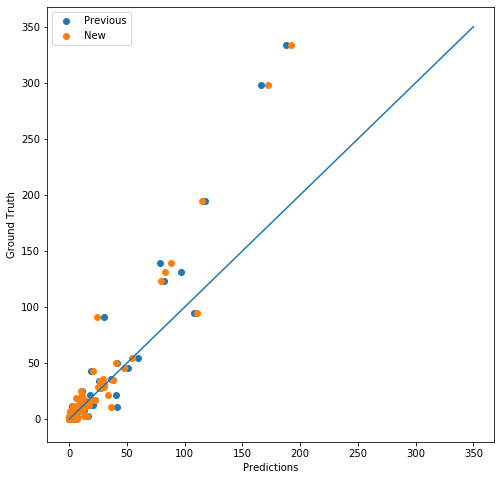

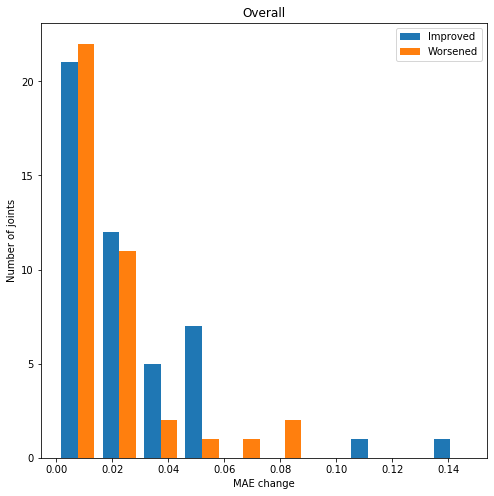

-------
-------
Narrowing Hands
Score improved on 0.5555555555555556% of joints
Mean Score improvement: -0.04090820045975511 (+/-:  0.0416347743986619 )
Mean Score worsen: 0.040893118284842246 (+/-:  0.028633897134885233 )


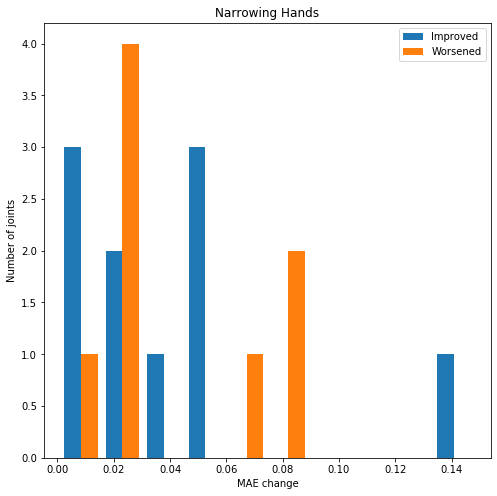

-------
-------
Narrowing Wrists
Score improved on 0.6666666666666666% of joints
Mean Score improvement: -0.014679402251478828 (+/-:  0.003650707655311487 )
Mean Score worsen: 0.004071433689966167 (+/-:  0.003887584839203892 )


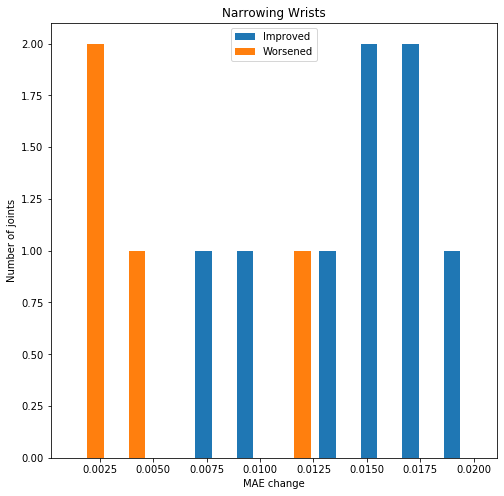

-------
-------
Narrowing Feet
Score improved on 0.4166666666666667% of joints
Mean Score improvement: -0.031743406190641955 (+/-:  0.019938662974504973 )
Mean Score worsen: 0.023557758957723225 (+/-:  0.018602955789714725 )


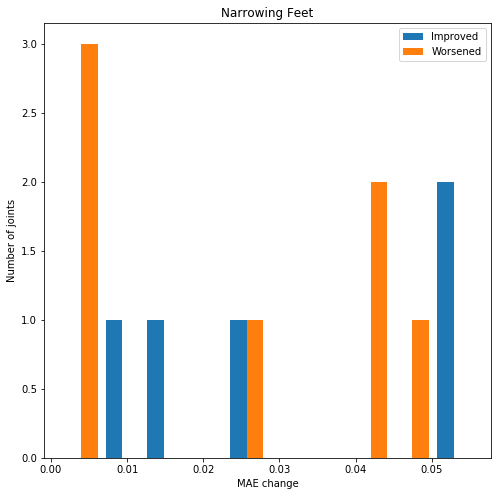

-------
-------
Erosion Hands
Score improved on 0.85% of joints
Mean Score improvement: -0.028504458605702755 (+/-:  0.026903851828912848 )
Mean Score worsen: 0.015095759827289168 (+/-:  0.01079011729165008 )


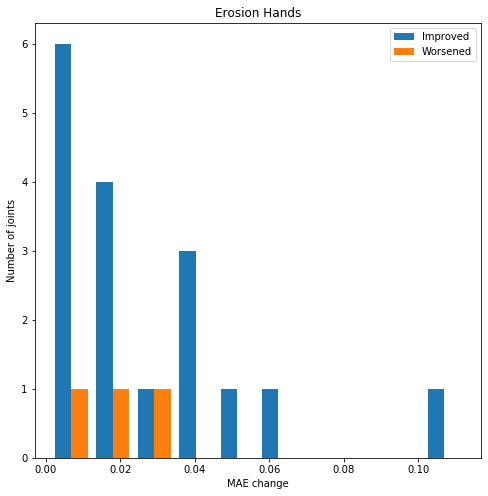

-------
-------
Erosion Wrists
Score improved on 0.3333333333333333% of joints
Mean Score improvement: -0.0025510492790353605 (+/-:  0.0006134212346092535 )
Mean Score worsen: 0.0038909860354842327 (+/-:  0.0022699686063434024 )


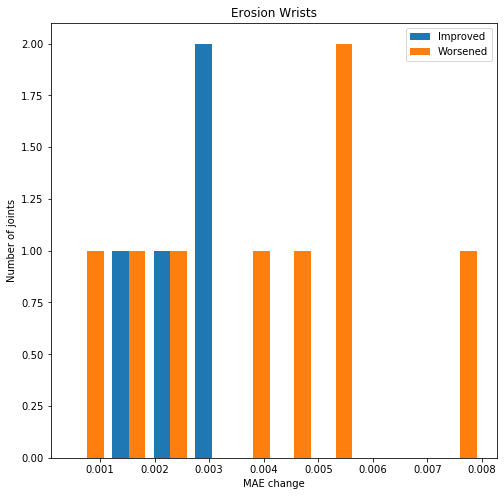

-------
-------
Erosion Feet
Score improved on 0.25% of joints
Mean Score improvement: -0.008671426911273214 (+/-:  0.009450492756829843 )
Mean Score worsen: 0.014424970503772418 (+/-:  0.006035174008218997 )


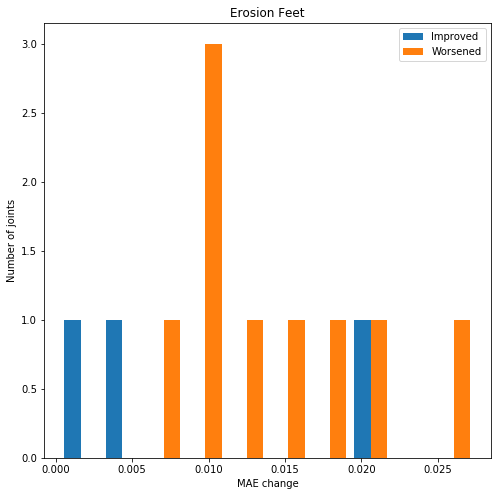

-------


In [5]:
print_report(truth, old_augs_preds_filter_new_feet_erosion, new_hand_models)

In [45]:
test = pd.DataFrame(hand_narrowing_predictions, index = np.arange(len(hand_narrowing_predictions)))

In [65]:
for n in range(5):
    zeros = test.iloc[np.where(test['truth'] == n)[0]]
    
    print(n, 'prev:', np.mean(zeros['prev:']), 'new:', np.mean(zeros['new:']))

0 prev: 0.08468343998449018 new: 0.10380502706213424
1 prev: 2.1633811791737876 new: 2.0447667241096497
2 prev: 1.5720093602483922 new: 1.374973377817637
3 prev: 2.401759321039373 new: 2.3512300659309733
4 prev: 3.206054874983701 new: 2.9251830220222472


In [50]:
np.where(test['truth'] == 1)[0].shape

(3,)

In [61]:
zeros = test.iloc[np.where(test['truth'] == 4)[0]]

print(zeros)

      truth     prev:      new:
6         4  3.002802  0.845022
98        4  2.742482  1.726484
110       4  3.550053  2.612222
190       4  1.794333  2.775022
202       4  3.891707  3.272391
282       4  0.298513  1.151518
294       4  1.342897  2.432030
372       4  3.655489  3.006887
374       4  2.398445  2.408871
432       4  1.010766  0.012996
459       4  2.981179  2.573872
466       4  3.872169  3.927384
478       4  3.908428  3.596950
506       4  3.806163  3.068691
530       4  3.894777  2.855278
545       4  3.886850  3.874956
558       4  3.934976  3.839496
570       4  3.869315  3.960268
598       4  3.902699  2.955927
616       4  2.857276  3.533812
622       4  3.163352  3.395443
650       4  3.925305  3.946579
662       4  3.831303  3.966530
742       4  3.895458  3.599109
754       4  3.427247  1.899593
834       4  3.326930  3.279385
924       4  3.658952  2.296517
926       4  3.817779  3.649331
938       4  3.641937  2.590381
1016      4  3.867101  2.387350
1018    

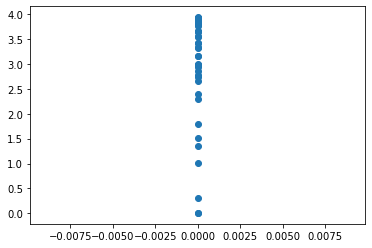

In [62]:
plt.scatter(np.zeros(zeros.shape[0]), zeros['prev:'])

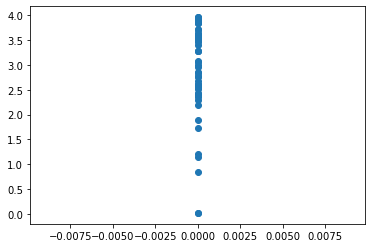

In [63]:
plt.scatter(np.zeros(zeros.shape[0]), zeros['new:'])

In [19]:
print(test.groupby(by = 'truth').describe())

        prev:                                                              \
        count      mean       std       min       25%       50%       75%   
truth                                                                       
0      1499.0  0.084683  0.399262  0.000000  0.000000  0.000000  0.000000   
1         3.0  2.163381  0.721608  1.557541  1.764214  1.970887  2.466301   
2        77.0  1.572009  1.009041  0.000000  0.737393  1.974912  2.025986   
3        22.0  2.401759  1.295105  0.038521  1.826459  2.965469  3.453168   
4        55.0  3.206055  1.036647  0.000000  2.952372  3.658952  3.889278   

                   new:                                     
            max   count mean  std  min  25%  50%  75%  max  
truth                                                       
0      3.894586  1499.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1      2.961716     3.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
2      3.890432    77.0  2.0  0.0  2.0  2.0  2.0  2.0  2.0  
3      3.894004  

Previous R2: 0.7338888372372045
New R2: 0.7536138834489792
Previous Narrowing R2: 0.8390737621042532
New Narrowing R2: 0.8720853640594071
Previous Erosion R2: 0.5464716734715618
New Erosion R2: 0.5017203755214951
Previous Overall MAE: 10.180528757202884
New Overall MAE: 9.891856627943723
-------
Previous Hand Narrowing R2 0.8715443221138615
New Hand Narrowing R2 0.8715443221138615
-------
Previous Wrist Narrowing R2 0.9112268038684017
New Wrist Narrowing R2 0.9112268038684017
-------
Previous Feet Narrowing R2 0.5716899060468756
New Feet Narrowing R2 0.7910637218549151
-------
Previous Hand Erosion R2 0.5260516463172056
New Hand Erosion R2 0.5260516463172056
-------
Previous Wrist Erosion R2 0.4987444602072888
New Wrist Erosion R2 0.4987444602072888
-------
Previous Feet Erosion R2 0.4513710973348185
New Feet Erosion R2 0.3980965337379455
-------
-------
Overall
Score improved on 0.6666666666666666% of joints
Mean Score improvement: -0.05250570955483809 (+/-:  0.02968966428482996 )
Mea

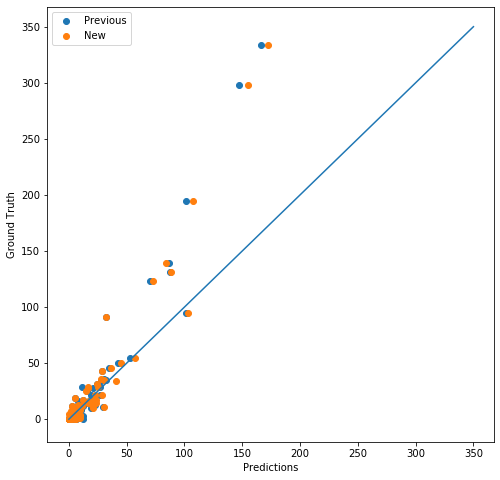

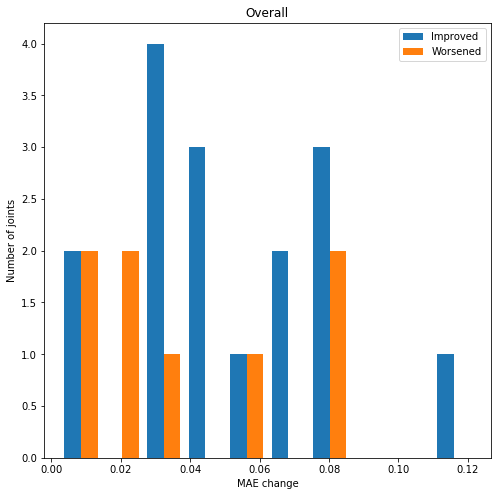

-------
-------
Narrowing Hands
-------
-------
Narrowing Wrists
-------
-------
Narrowing Feet
Score improved on 0.6666666666666666% of joints
Mean Score improvement: -0.04171788575046735 (+/-:  0.019383393561403586 )
Mean Score worsen: 0.04580933624959511 (+/-:  0.028945723166828793 )


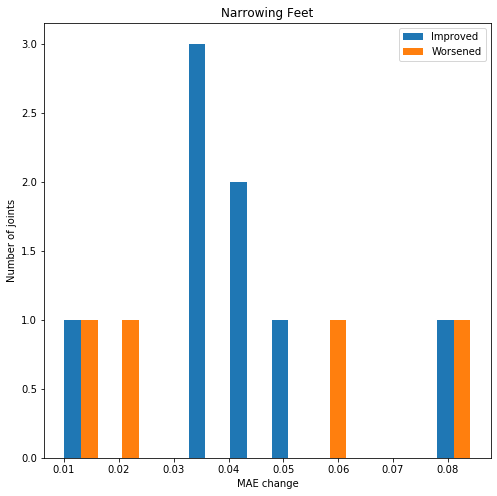

-------
-------
Erosion Hands
-------
-------
Erosion Wrists
-------
-------
Erosion Feet
Score improved on 0.6666666666666666% of joints
Mean Score improvement: -0.06329353335920883 (+/-:  0.033977670606844985 )
Mean Score worsen: 0.03419260235260364 (+/-:  0.029291177181604306 )


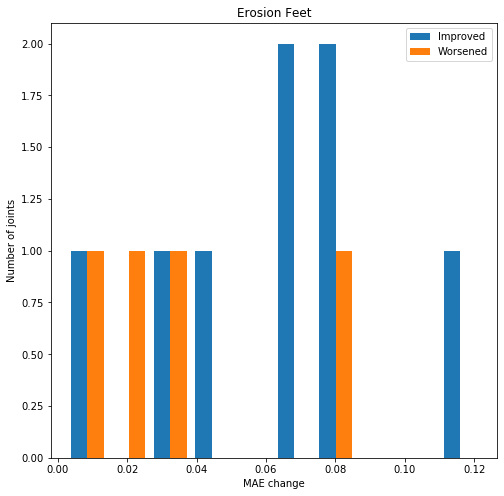

-------


In [15]:
print_report(truth, adam_no_weights_shuffle, adam_no_weights_reg_shuffle_hand_pretrain) 

Previous R2: 0.7141595889726446
New R2: 0.8099294391778697
Previous Narrowing R2: 0.8632838358917424
New Narrowing R2: 0.8730628046855353
Previous Erosion R2: 0.47104570278039537
New Erosion R2: 0.6006009084144632
Previous Overall MAE: 10.139680860068083
New Overall MAE: 11.772728108385902
-------
Previous Hand Narrowing R2 0.9061566325674564
New Hand Narrowing R2 0.8735435813793699
-------
Previous Wrist Narrowing R2 0.9266446755545681
New Wrist Narrowing R2 0.8084343447584205
-------
Previous Feet Narrowing R2 0.5976912110764925
New Feet Narrowing R2 0.6838475082210307
-------
Previous Hand Erosion R2 0.5210499083689656
New Hand Erosion R2 0.6106556337757483
-------
Previous Wrist Erosion R2 0.6542266861600035
New Wrist Erosion R2 0.555979108509397
-------
Previous Feet Erosion R2 0.24800168323233884
New Feet Erosion R2 0.41704335387732816
-------
Score improved on 17 out of 86 joints (0.19767441860465115)
Mean Score improvement: -0.03130529557183252 (+/-:  0.02802125044951761 )
Mean

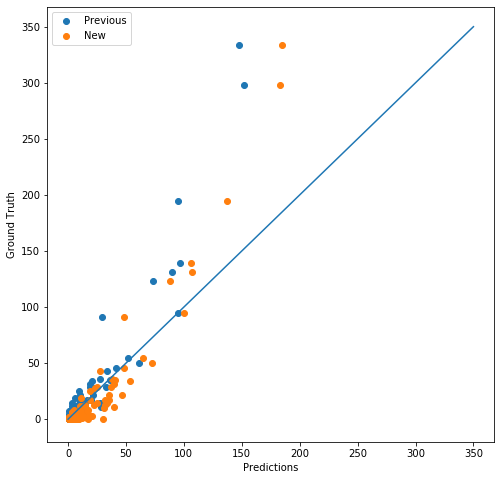

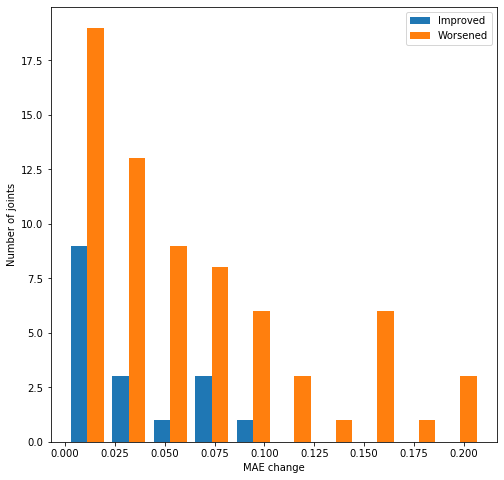

In [57]:
print_report(truth, adam_no_weights_reg_output, adam_no_weights_reg_shuffle_hand_pretrain) 

Previous R2: 0.7650227655992576
New R2: 0.660046077722041
Previous Narrowing R2: 0.8784761360736698
New Narrowing R2: 0.8068473285958129
Previous Erosion R2: 0.5464716734715618
New Erosion R2: 0.4292044431461174
Previous Overall MAE: 9.766242914185252
New Overall MAE: 11.668465146562085
Previous Hand Narrowing R2 0.9057336179193392
New Hand Narrowing R2 0.8561712599244258
Previous Wrist Narrowing R2 0.9112268038684017
New Wrist Narrowing R2 0.8676873841307732
Previous Feet Narrowing R2 0.6495187324727376
New Feet Narrowing R2 0.4574978377166101
Previous Hand Erosion R2 0.5260516463172056
New Hand Erosion R2 0.4955024203220143
Previous Wrist Erosion R2 0.4987444602072888
New Wrist Erosion R2 0.6517466406539302
Previous Feet Erosion R2 0.4513710973348185
New Feet Erosion R2 0.22796951013531364
Score improved on 40 out of 86 joints (0.46511627906976744)
Mean Score improvement: -0.039760374345907776 (+/-:  0.033233161838300974 )
Mean Score worsen: 0.03751361654500964 (+/-:  0.0356697354883

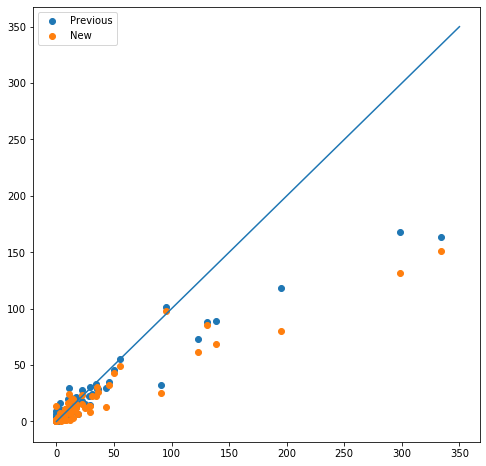

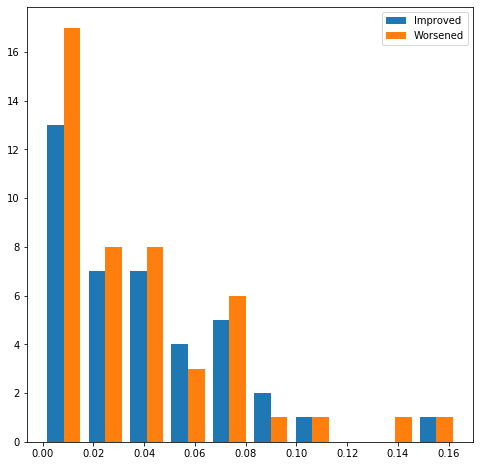

In [33]:
print_report(truth, adam_no_weights_shuffle_comb, adam_no_weights_reg) 